# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.001
-0.004
-0.003
-0.003
-0.003
0.002
0.001
0.0
-0.002
0.003
0.0
-0.003
-0.001
-0.001
0.001
0.0
-0.001
-0.001
-0.003
-0.002
-0.004
-0.002
-0.002
-0.002
0.0
-0.003
-0.003
-0.004
-0.006
-0.005
-0.004
-0.005
-0.006
-0.005
-0.003
-0.003
-0.004
0.997
0.994
0.994
0.994
1.993
1.993
1.993
1.992
1.996
2.992
2.992
3.987
3.989
3.991
3.989
3.99
4.99
4.99
5.982
5.982
5.982
6.837
6.844
6.844
6.845
6.841
7.731
7.732
7.731
7.729
7.729
8.726
8.726
8.724
9.726
9.723
9.724
9.723
9.726
10.721
10.721
10.722
11.712
11.719
11.722
12.716
12.716
12.715
12.712
12.717
13.71
13.713
13.713
13.712
13.708
14.335
14.344
14.341
14.34
14.337
14.969
14.976
14.973
14.974
14.972
15.973
15.973
15.969
15.971
15.97
16.964
16.964
17.963
17.963
17.965
17.964
18.959
19.95
19.955
19.953
19.953
19.956
20.953
20.953
20.951
21.958
21.957
21.957
21.957
22.501
22.501
22.5
23.043
23.042
23.042
23.042
24.042
24.041
24.036
24.037
25.032
25.032
25.034
25.031
25.033
26.021
26.021
26.02
27.023
27.023
27.019
27.019
28.015
28.011
28.011
2

58.063
58.067
58.067
58.066
58.191
58.262
58.318
58.318
58.315
58.316
58.313
58.316
58.316
58.316
58.314
58.315
58.367
58.373
58.37
58.368
58.372
58.372
58.376
58.37
58.368
58.371
58.37
58.37
58.367
58.368
58.583
58.592
58.592
58.592
58.59
58.59
58.591
58.592
58.593
58.591
58.835
58.84
58.84
58.838
58.843
58.842
58.842
58.842
59.054
59.054
59.055
59.056
59.054
59.059
59.307
59.312
59.309
59.31
59.309
59.314
59.315
59.313
59.314
59.315
59.801
59.801
59.801
59.801
59.802
59.799
59.802
59.801
60.15
60.149
60.151
60.149
60.15
60.146
60.144
60.145
60.145
60.144
60.146
60.146
60.146


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.001
1,2,-0.004
2,4,-0.003
3,6,-0.003
4,8,-0.003
...,...,...
1276,2552,60.145
1277,2554,60.144
1278,2556,60.146
1279,2558,60.146


<IPython.core.display.Javascript object>


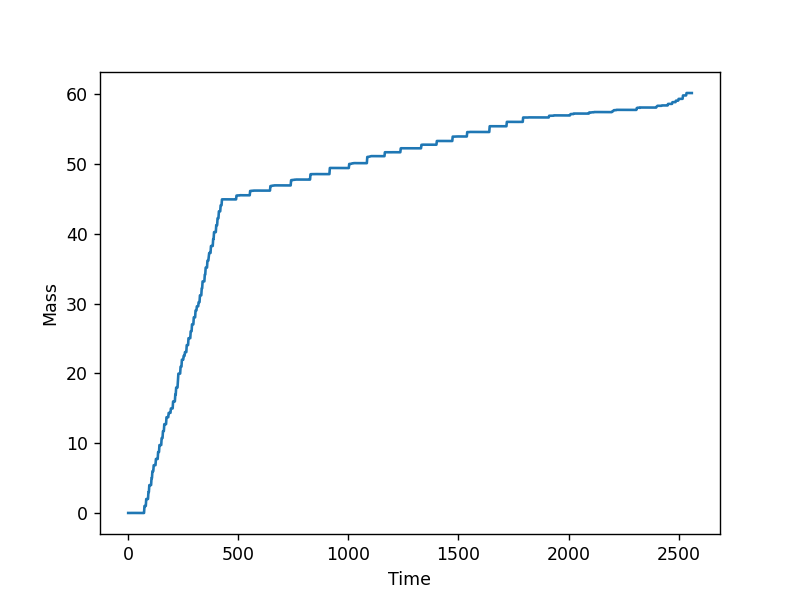

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_240423_S337-342.csv')